## -------------------------------------------Regression outlier effect.-------------------------------------------



In [1]:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

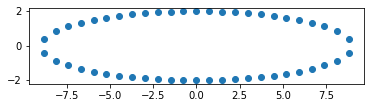

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

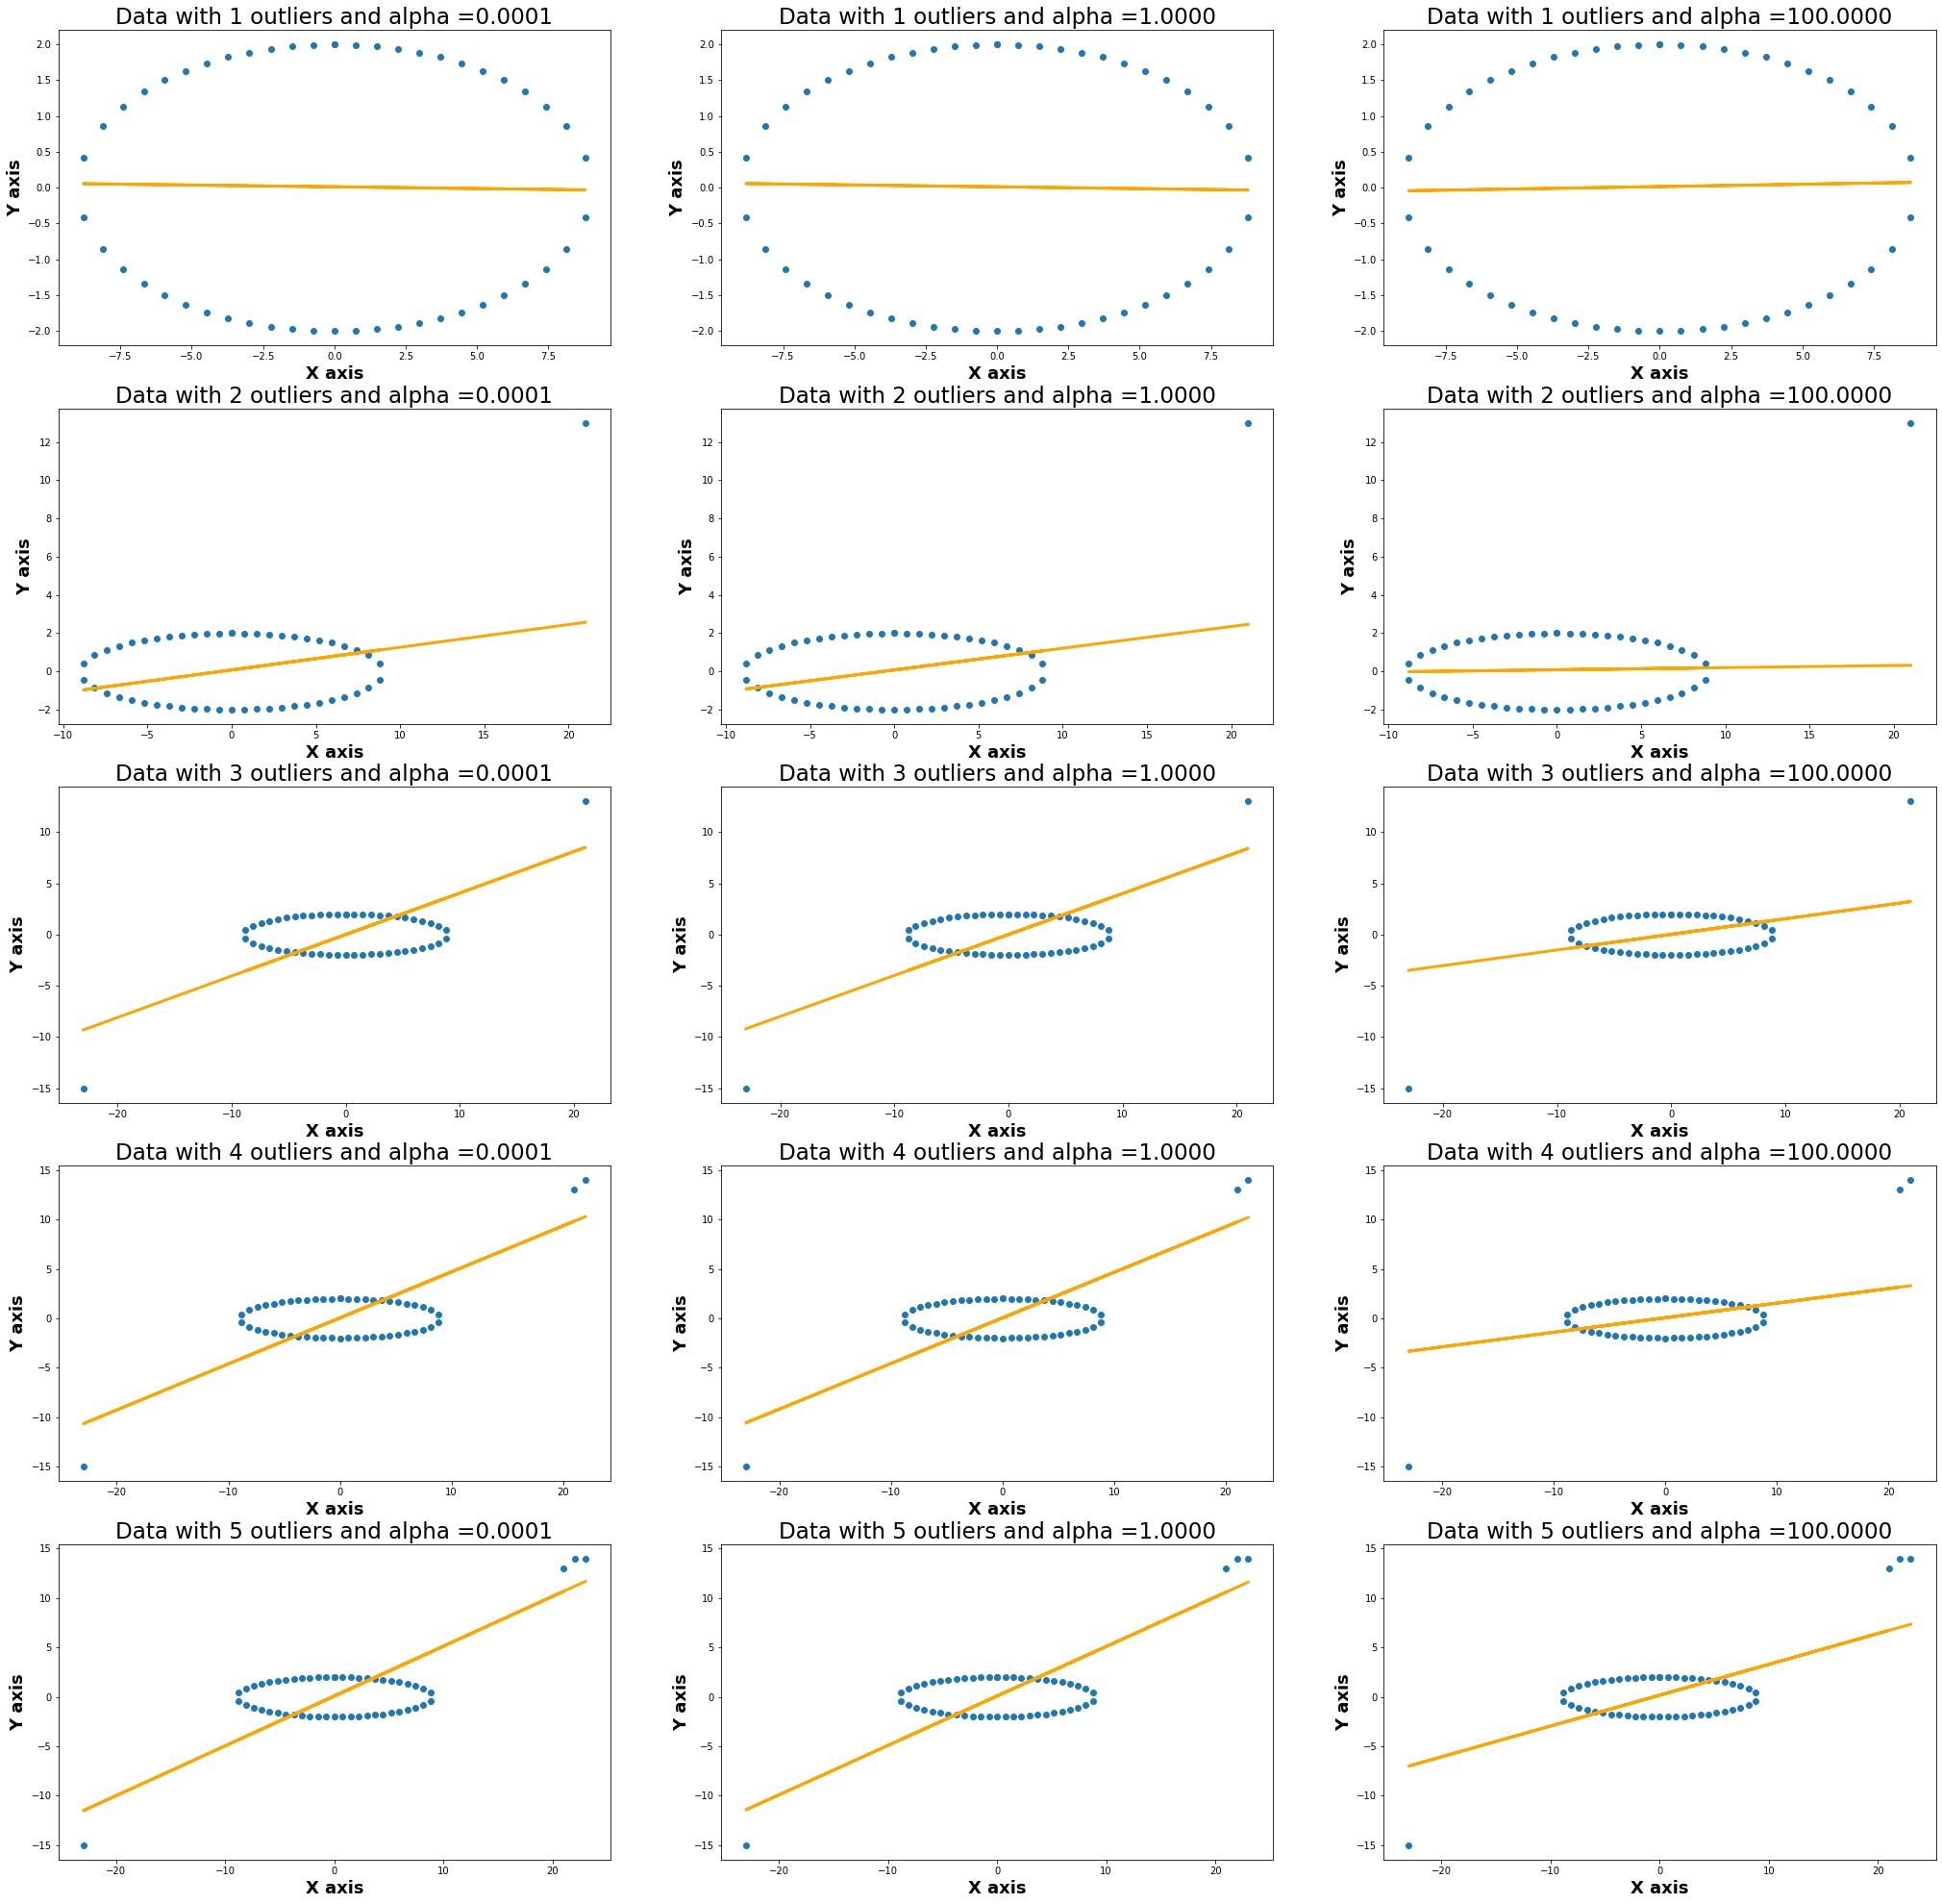

In [5]:
X= b * np.sin(phi)
Y= a * np.cos(phi)
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]            
alpha=[0.0001, 1, 100] 
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(35, 35))
for idx,i in enumerate(outliers): #for each outlier
    X=np.append(X,outliers[idx][0])    #adding each outlier to data
    Y=np.append(Y,outliers[idx][1])

    for j in range(len(alpha)):                                #for each regularization value
        lr_reg=SGDRegressor(alpha=alpha[j], eta0=0.001, learning_rate='constant',random_state=0,loss='squared_error')
        lr_reg.fit(X.reshape(-1,1),Y)                          #array.reshape(-1, 1) since our data has a single feature
        Y_pred =lr_reg.predict(X.reshape(-1,1))       
        axes[idx, j].scatter(X,Y)                              #plotting all the class 1 points
        axes[idx, j].plot(X,Y_pred,linewidth=3.0,color ='orange') #plotting hyperplace
        axes[idx, j].set_title("Data with %d outliers and alpha =%1.4f"%((idx+1),alpha[j]),fontsize=23)
        axes[idx, j].set_xlabel('X axis', fontweight ='bold', fontsize=18)
        axes[idx, j].set_ylabel('Y axis', fontweight ='bold',fontsize=18)
fig.show()


# Observation
- when we have **very small alpha value**, the weightge given to regularisation term will be lower which means the **week regularization** is done. so **even a few number of ourliers can change the model**.


- when we have **very large alpha value**, the weightge given to regularisation term will be much higher which means **strong regularization** is done.so our model's tendancy to avoid overfitting helps avoid fitting too much to the outliers. so even a few reasonable number of ourliers do not cause large change to the model.
